In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')


from highlight_text import HighlightText, ax_text, fig_text

**https://fivethirtyeight.com/features/complete-catalog-curses-deaths-quentin-tarantino-films/**

In [2]:
df = pd.read_csv('tarantino.csv')

In [3]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [7]:
df.describe(include='all')

,movie,type,word,minutes_in
count,1894,1894,1704,1894.000000
unique,7,2,60,NaN
top,Pulp Fiction,word,fucking,NaN
freq,476,1704,407,NaN
mean,NaN,NaN,NaN,71.529071
std,NaN,NaN,NaN,45.075036
min,NaN,NaN,NaN,0.400000
25%,NaN,NaN,NaN,29.655000
50%,NaN,NaN,NaN,70.525000
75%,NaN,NaN,NaN,112.835000


In [5]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [8]:
counted_words = df[df['type']=='word']
counted_words = (counted_words.groupby(['movie']).count())
counted_words = counted_words[['type']]
counted_words = counted_words.sort_values('type', ascending=False).reset_index()
sorted_list = counted_words['movie'].tolist()

In [9]:
counted_words

,movie,type
0,Pulp Fiction,469
1,Reservoir Dogs,421
2,Jackie Brown,368
3,Django Unchained,262
4,Kill Bill: Vol. 2,69
5,Inglorious Basterds,58
6,Kill Bill: Vol. 1,57


Text(0.5, 23.52222222222222, 'Count')

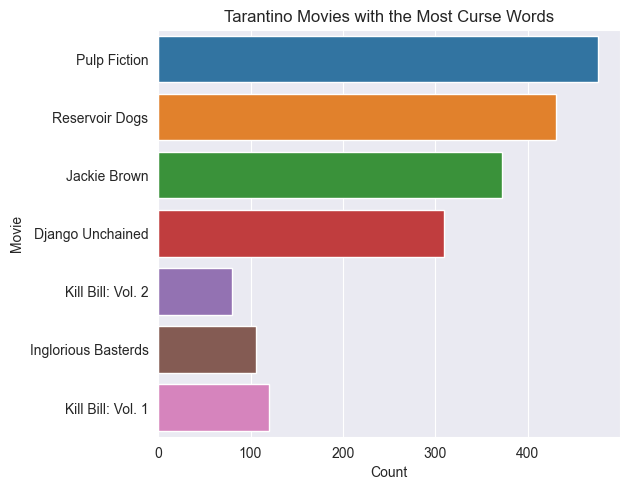

In [10]:
sns.countplot(data=df, y='movie', orient='h', order=sorted_list)
plt.tight_layout()
plt.title('Tarantino Movies with the Most Curse Words')
plt.ylabel('Movie')
plt.xlabel('Count')

<Axes: xlabel='minutes_in', ylabel='Count'>

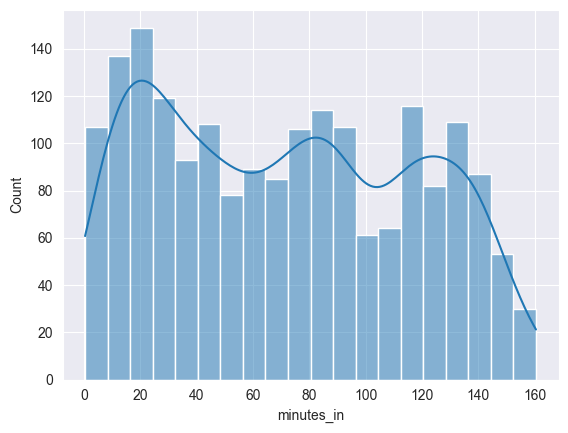

In [137]:
sns.histplot(data=df, x='minutes_in', kde=True, bins=20)

In [309]:
all_words_sorted = (df.groupby(['word']).count())
all_words_sorted = all_words_sorted[['type']].sort_values('type', ascending=False).reset_index()

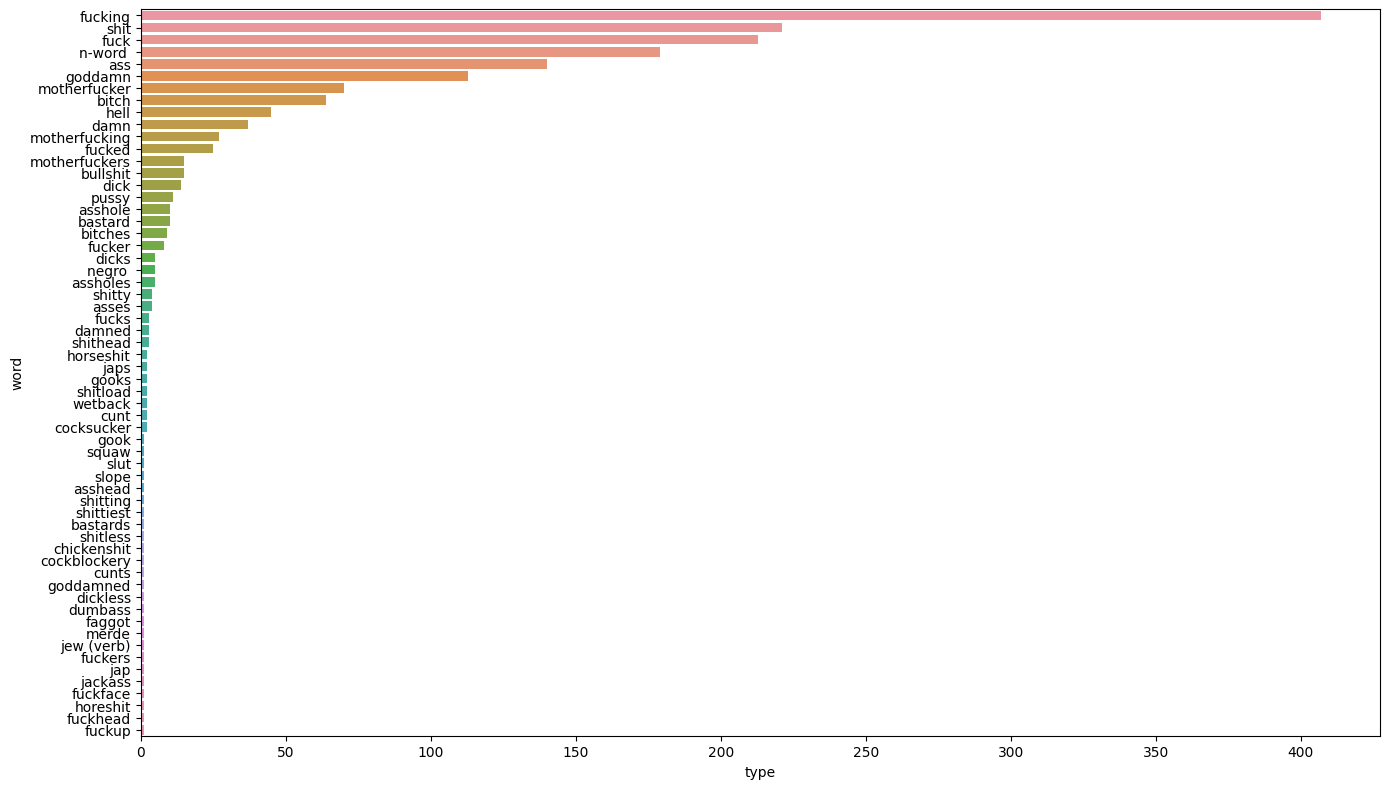

In [128]:
plt.figure(figsize=(14,8))
sns.barplot(data=all_words_sorted, y='word', x='type', orient='h')
plt.tight_layout()

In [146]:
words_sorted = (df.groupby(['word']).count())
words_sorted = words_sorted[['type']].sort_values('type', ascending=False).reset_index()

Text(0, 0.5, 'Word')

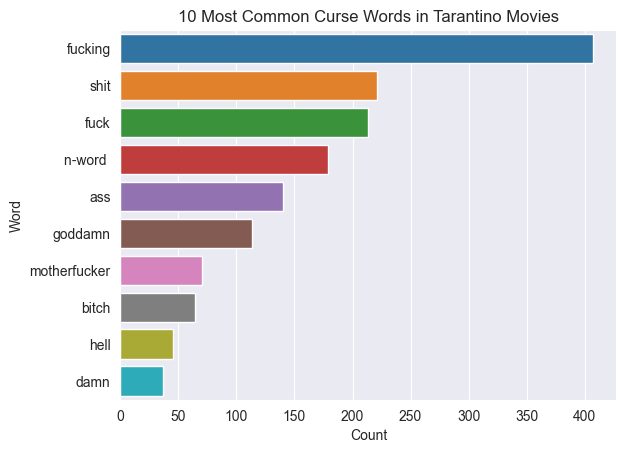

In [147]:
sns.barplot(data=words_sorted.head(10), y='word', x='type', orient='h')
plt.title('10 Most Common Curse Words in Tarantino Movies')
plt.xlabel('Count')
plt.ylabel('Word')

In [42]:
counted_kills = df[df['type']=='death']
counted_kills = counted_kills.groupby('movie').count()
counted_kills = counted_kills[['type']].reset_index()
counted_kills = counted_kills.sort_values('type', ascending=False)

Text(0.5, 0, 'Kills')

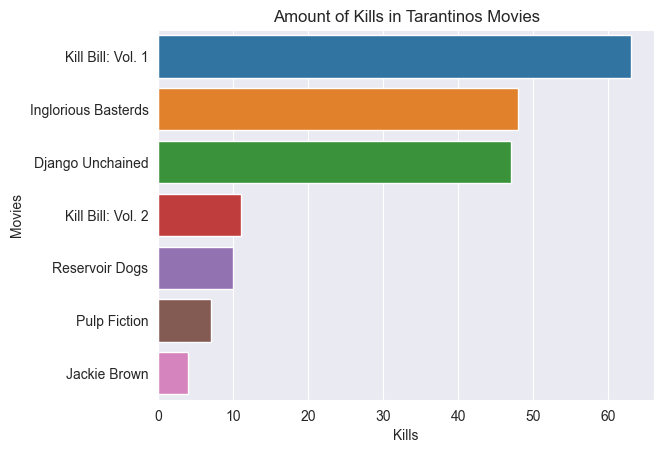

In [43]:
sns.barplot(data=counted_kills, y='movie', x='type')
plt.title('Amount of Kills in Tarantinos Movies')
plt.ylabel('Movies')
plt.xlabel('Kills')

In [44]:
pulp_fiction = df[df['movie']=='Pulp Fiction']

In [99]:
django = df[df['movie']=='Django Unchained']

In [54]:
dogs = df[df['movie']== 'Reservoir Dogs']

In [59]:
kill_bill_1 = df[df['movie']=='Kill Bill: Vol. 1']

In [63]:
kill_bill_2 = df[df['movie']=='Kill Bill: Vol. 2']

In [94]:
bastards = df[df['movie']=='Inglorious Basterds']

In [98]:
jackie = df[df['movie']=='Jackie Brown']

In [82]:
df['movie'].unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

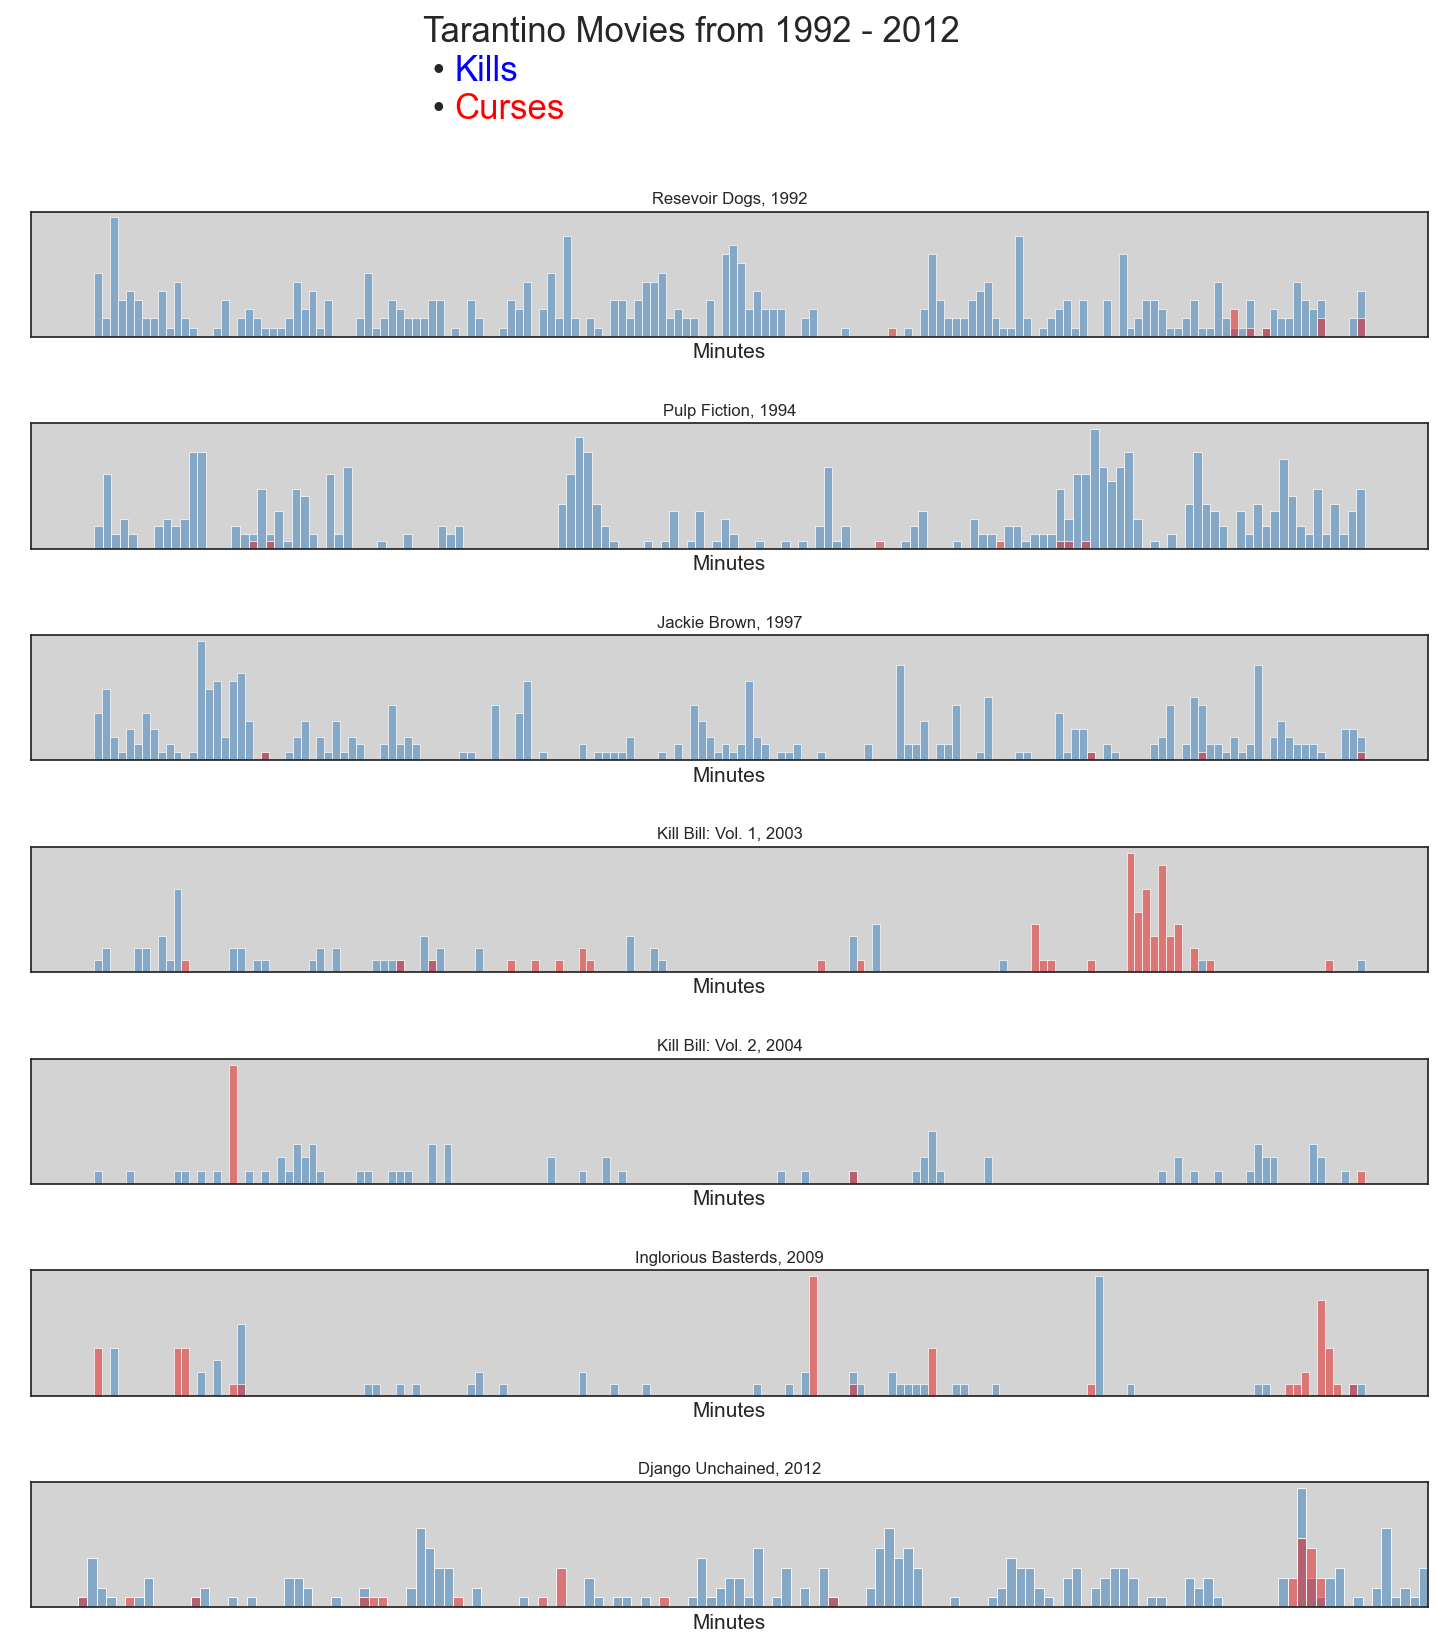

In [190]:
fig, axes = plt.subplots(7, 1)

# Figure sizeing
fig.set_figheight(15)
fig.set_figwidth(15)


# Movies
ax_0 = sns.histplot(data=dogs, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                    legend=False, ax=axes[0])
plt.xlim(dogs['minutes_in'].min()-2, dogs['minutes_in'].max()+2)
ax_0.title.set_text('Resevoir Dogs, 1992')
ax_0.set_facecolor('lightgrey')

ax_1 = sns.histplot(data=pulp_fiction, x='minutes_in', bins=148, hue='type', hue_order=['death', 'word'], palette='Set1',
                    legend=False, ax=axes[1])
plt.xlim(pulp_fiction['minutes_in'].min()-2, pulp_fiction['minutes_in'].max()+2)
ax_1.title.set_text('Pulp Fiction, 1994')
ax_1.set_facecolor('lightgrey')


ax_2 = sns.histplot(data=kill_bill_1, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                    legend=False, ax=axes[3])
plt.xlim(kill_bill_1['minutes_in'].min()-2, kill_bill_1['minutes_in'].max()+2)
ax_2.title.set_text('Kill Bill: Vol. 1, 2003')
ax_2.set_facecolor('lightgrey')


ax_3 = sns.histplot(data=kill_bill_2, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                      legend=False, ax=axes[4])
plt.xlim(kill_bill_2['minutes_in'].min()-2, kill_bill_2['minutes_in'].max()+2)
ax_3.title.set_text('Kill Bill: Vol. 2, 2004')
ax_3.set_facecolor('lightgrey')


ax_4 = sns.histplot(data=bastards, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                          legend=False, ax=axes[5])
plt.xlim(bastards['minutes_in'].min()-2, bastards['minutes_in'].max()+2)
ax_4.title.set_text('Inglorious Basterds, 2009')
ax_4.set_facecolor('lightgrey')


ax_5 = sns.histplot(data=django, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                            
                        legend=False, ax=axes[6])
plt.xlim(django['minutes_in'].min()-2, django['minutes_in'].max()+2)
ax_5.title.set_text('Django Unchained, 2012')
ax_5.set_facecolor('lightgrey')


ax_6 = sns.histplot(data=jackie, x='minutes_in', bins=160, hue='type', hue_order=['death', 'word'], palette='Set1',
                            legend=False, ax=axes[2])
plt.xlim(jackie['minutes_in'].min()-2, jackie['minutes_in'].max()+2)
ax_6.title.set_text('Jackie Brown, 1997')
ax_6.set_facecolor('lightgrey')


# labels
plt.xlabel('Minutes')
plt.tight_layout()

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

    
for ax in axes:    
    ax.set_xlabel('Minutes', size=15)
    ax.set_ylabel(' ')
    
    
HighlightText(x=25, y=35, fontsize=25,
              s='Tarantino Movies from 1992 - 2012\n • <Kills>\n • <Curses>',
              highlight_textprops=[{"color": 'blue'},
                                   {"color": 'red'}],
              ax=axes[0])



In [192]:
dummies = pd.get_dummies(data=df['type'])

In [193]:
df2 = pd.concat([df,dummies],axis=1)
df2 = df2.reset_index(drop=True)
df2 = df2.groupby(['movie']).sum({'word':'count', 'death':'count'})
df2.drop('minutes_in', axis=1, inplace=True)

In [194]:
df2['Curse/Death Ratio'] = df2['word']/df2['death']
df2 = df2.round(1)
df2 = df2.rename({'word': 'Curses', 'death': 'Deaths'}, axis=1)

In [195]:
df2 = df2[['Curses', 'Deaths', 'Curse/Death Ratio']]

In [196]:
df2 = df2.sort_values('Curse/Death Ratio', ascending=False)

In [212]:
word_count = df.groupby('word').agg({'word':'count'})
word_count = word_count.rename({'word':'count'},axis=1)
word_count['% of Total Curses'] = word_count['count']/word_count['count'].sum()*100
top_10_word_count = word_count.sort_values('% of Total Curses', ascending=False).head(10).round(1)
top_10_word_count

,count,% of Total Curses
word,,
fucking,407,23.9
shit,221,13.0
fuck,213,12.5
n-word,179,10.5
ass,140,8.2
goddamn,113,6.6
motherfucker,70,4.1
bitch,64,3.8
hell,45,2.6
